# Orders - Multivariate Regression of review_score

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# import modules 
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
''' You can download the solution for yesterday's optional distance_seller_customer function from Kitt 
and paste it into your olist/orders.py file, if you weren't able to complete it '''
# import orders dataset
from olist.order import Order
orders = Order().get_training_data(with_distance_seller_customer=True)

Let's recall our simple analysis from yesterday's exercise: 

Based on our correlation matrix below, we notice that `review_score` is mostly correlated with the two features `wait_time` and `delay_vs_expected`. However, these two features are also highly correlated with each other. In this exercise, we will use `statsmodels` to distinguish the effect of one feature, **holding the other one constant**.

<AxesSubplot:>

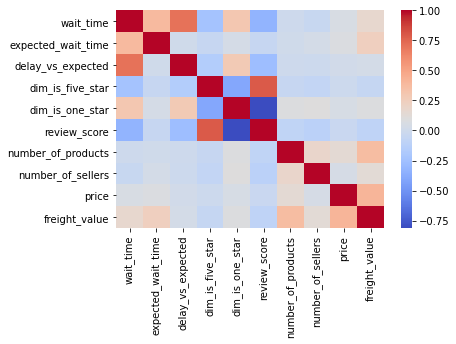

In [4]:
sns.heatmap(orders.corr(), cmap='coolwarm')

(0.0, 5.924553918878296)

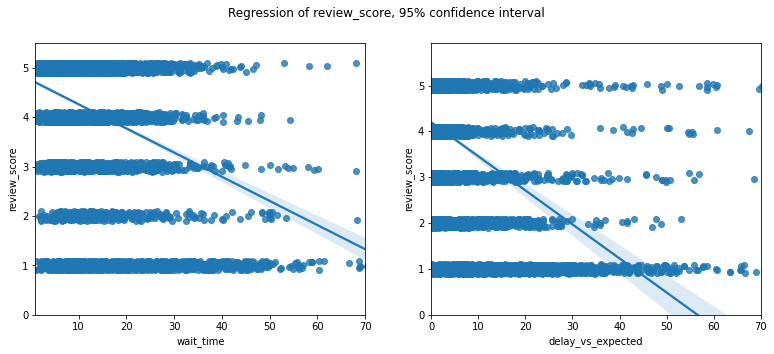

In [5]:
sample = orders.sample(10000, random_state=42)
plt.figure(figsize=(13,5))
plt.suptitle('Regression of review_score, 95% confidence interval')
plt.subplot(1,2,1)
sns.regplot(x = sample.wait_time, y= sample.review_score, y_jitter=.1, ci=95)
plt.xlim(right=70)
plt.ylim(bottom=0)

plt.subplot(1,2,2)
sns.regplot(x = orders.delay_vs_expected, y= orders.review_score, y_jitter=.1, ci=95)
plt.xlim(right=70)
plt.ylim(bottom=0)

## 1 - Univariate regression

❓Use [statsmodels](https://www.statsmodels.org/stable/generated/statsmodels.formula.api.ols.html) with `statsmodels.formula.api` to quickly make
 - `model1`: an ols regression of `review_score` over `wait_time`
 - `model2`: an ols regression of `review_score` over `delay_vs_expected`

For each, Print the `summary` table and interpret the results:
- Make sure to understand how these results match those of the seaborn regplot
- Read the regression performance metric R-squared, as well as individual regression coefficients, t-values, p-values, and 95% confidence intervals

In [6]:
import statsmodels.formula.api as smf

In [7]:
# YOUR CODE HERE
model = smf.ols(formula = 'review_score ~ wait_time', data=orders).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           review_score   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                 1.225e+04
Date:                Wed, 04 Aug 2021   Prob (F-statistic):               0.00
Time:                        14:56:57   Log-Likelihood:            -1.5707e+05
No. Observations:               97007   AIC:                         3.142e+05
Df Residuals:                   97005   BIC:                         3.142e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.7138      0.006    726.803      0.000       4.701       4.727
wait_time     -0.0455      0.000   -110.664      0.000      -0.046      -0.045
==============================================================================
Omnibus:                    19241.637   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            34157.401
Skew:                          -1.282   Prob(JB):                         0.00
Kurtosis:                       4.371   Cond. No.                         26.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:ylabel='Count'>

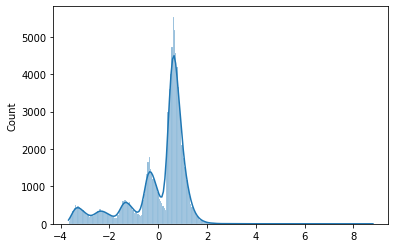

In [8]:
sns.histplot(model.resid, kde=True, edgecolor='w')

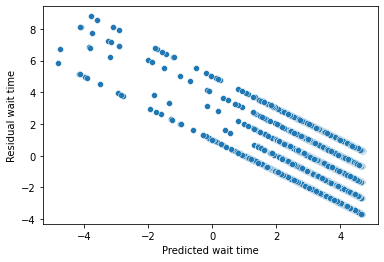

In [9]:
#model.predict(orders['wait_time'])

sns.scatterplot(x=model.predict(orders['wait_time']), y=model.resid)
plt.xlabel('Predicted wait time')
plt.ylabel('Residual wait time')
plt.show();

## So:

#### For each day delay of the order, review score decrease on average by ~ 0.05 points. (btw [4.701,4.727] ~  95%)
#### If we have our order 'ipso-facto' (delay=0), review score is 4.7 points on average



In [10]:
# YOUR CODE HERE
model2 = smf.ols(formula = 'review_score ~ delay_vs_expected', data=orders).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           review_score   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     7743.
Date:                Wed, 04 Aug 2021   Prob (F-statistic):               0.00
Time:                        14:56:59   Log-Likelihood:            -1.5912e+05
No. Observations:               97007   AIC:                         3.182e+05
Df Residuals:                   97005   BIC:                         3.183e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             4.1997      0.004   1034.674      0.000       4.192       4.208
delay_vs_expected    -0.0742      0.001    -87.995      0.000      -0.076      -0.073
==============================================================================
Omnibus:                    20264.119   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            46233.422
Skew:                          -1.191   Prob(JB):                         0.00
Kurtosis:                       5.401   Cond. No.                         4.88
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 2 - Multivariate regression

❓ What is the impact on `review_score` of adding one day of `delay_vs_expected` to the order, **holding `wait_time` constant**? Which of the two features is the most explicative for the low `review_score`?

For that purpose, run an OLS model `model3` where both `wait_time` and `delay_vs_expected` are the features (independent variables), and `review_score` is the target (dependent variable)

In [11]:
# YOUR CODE HERE
model3 = smf.ols(formula = 'review_score ~ wait_time + delay_vs_expected', data=orders).fit()

model3.summary()
model3.params

Intercept            4.643971
wait_time           -0.038752
delay_vs_expected   -0.019144
dtype: float64

----
❓Our multivariate regression allows us to isolate the impact of one feature, while controlling the effect of other features. These new coefficients are called **partial correlation** coefficients. Can you notice the difference with the **simple regression** coeffients computed with seaborn above? What can you say about the relative slopes for `wait_time` and `delay_vs_expected`? 


# Your answer
If ceteris paribus:

    * For each increase day in waiting day, the customer decrease your review score by 0.0388 : [0.040 , 0.038] 95%
    * For each delay day, the customer decrease your review score by 0.0191 : [0.021 , 0.017] 95%

<details>
    <summary>💡 Solution</summary>

- Holding `wait_time` constant, each additional day of `delay` reduces the review_score on average by 0.0191 [0.017 - 0.21] points
- Holding `delay` constant, each additional day of `wait_time` reduces the review_score on average by 0.0388 points 

Contrary to what was found with the simple bivariate correlation analysis, `delay` is actually less impactful than `wait_time` in driving lower `review_score`! This interesting finding demonstrates the importance of multi-variate regression to remove the potential impact of confounding factors

---
❓ R-squared is quite low: no more than 12% of the variation of review_score is explained by the combined variations of `wait_time` and `delay_vs_expected`. Let's try to add more features to our regression to improve explainability.

- Create a new OLS `model4` with more features from `orders` dataset.
    - Do not create **data leaks**: do not add features that are directly derived from the `review_score`
    - Do not add two features perfectly colinear with each other
    - Transform each feature $X_i$ into its respective z-score $Z_i = \frac{X_i - \mu_i}{\sigma_i}$ in order to compare the partial regression coefficients $\beta_i$ together. Otherwise, the $\beta_i$ are not of the same dimension, meaning you'll be comparing apples (e.g. "review_stars per day") with oranges (e.g. "review_stars per BRL")!

In [12]:
orders.corr()

,wait_time,expected_wait_time,delay_vs_expected,dim_is_five_star,dim_is_one_star,review_score,number_of_products,number_of_sellers,price,freight_value
wait_time,1.000000,0.383318,0.707487,-0.234906,0.306431,-0.334806,-0.011063,-0.040828,0.055433,0.166979
expected_wait_time,0.383318,1.000000,0.006043,-0.050155,0.034935,-0.052191,0.009932,0.024938,0.076307,0.239346
delay_vs_expected,0.707487,0.006043,1.000000,-0.157156,0.283298,-0.271885,-0.008711,-0.017225,0.016915,0.024540
dim_is_five_star,-0.234906,-0.050155,-0.157156,1.000000,-0.400283,0.792079,-0.051578,-0.070451,-0.013972,-0.059596
dim_is_one_star,0.306431,0.034935,0.283298,-0.400283,1.000000,-0.810262,0.087098,0.101858,0.046139,0.084019
review_score,-0.334806,-0.052191,-0.271885,0.792079,-0.810262,1.000000,-0.087325,-0.116317,-0.036006,-0.091023
number_of_products,-0.011063,0.009932,-0.008711,-0.051578,0.087098,-0.087325,1.000000,0.179846,0.141298,0.369690
number_of_sellers,-0.040828,0.024938,-0.017225,-0.070451,0.101858,-0.116317,0.179846,1.000000,0.043235,0.133574
price,0.055433,0.076307,0.016915,-0.013972,0.046139,-0.036006,0.141298,0.043235,1.000000,0.411506
freight_value,0.166979,0.239346,0.024540,-0.059596,0.084019,-0.091023,0.369690,0.133574,0.411506,1.000000


In [13]:
All = ['wait_time','delay_vs_expected','review_score','number_of_products','price','freight_value']
data_leaks = ['dim_is_five_star','dim_is_one_star']
colineal = ['expected_wait_time', 'number_of_sellers']
#orders.describe()

In [14]:
All = ['wait_time', 'expected_wait_time', 'delay_vs_expected', 'number_of_products', 'number_of_sellers', 'price', 'freight_value']
## Colineal
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_variables = orders[All]

vif_data = pd.DataFrame()
vif_data["feature"] = X_variables.columns
vif_data["VIF"] = [variance_inflation_factor(X_variables.values, i) for i in range(len(X_variables.columns))]
vif_data

,feature,VIF
0,wait_time,7.755583
1,expected_wait_time,11.566364
2,delay_vs_expected,2.471889
3,number_of_products,1.611938
4,number_of_sellers,8.315102
5,price,1.720346
6,freight_value,3.127611


In [15]:
1/(1-smf.ols(formula = f'review_score ~ {("+").join(All)}', data=orders).fit().rsquared)

1.1653931009907506

In [16]:
# standardize features (transform them into their respective z-scores)
df = orders[All] #distance
cols = list(df.columns)

df[cols]

df_zscore  = pd.DataFrame()

for col in cols:
    col_zscore = col + '_zscore'
    df_zscore[col_zscore] = (df[col] - df[col].mean())/df[col].std()
    
df_zscore['review_score'] = orders['review_score']

In [17]:
# Create and train model4
All_z_score = [feature+'_zscore' for feature in All]
model4 = smf.ols(formula = 'review_score ~ wait_time_zscore+expected_wait_time_zscore+delay_vs_expected_zscore+number_of_products_zscore+number_of_sellers_zscore+price_zscore+\
freight_value_zscore', data=df_zscore).fit()

#wait_time_zscore+expected_wait_time_zscore+delay_vs_expected_zscore+number_of_products_zscore+number_of_sellers_zscore+price_zscore+freight_value_zscore

model4.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           review_score   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     2292.
Date:                Wed, 04 Aug 2021   Prob (F-statistic):               0.00
Time:                        14:57:00   Log-Likelihood:            -1.5542e+05
No. Observations:               97007   AIC:                         3.108e+05
Df Residuals:                   96999   BIC:                         3.109e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     4.1422      0.004   1074.150      0.000       4.135       4.150
wait_time_zscore             -0.4657      0.007    -71.337      0.000      -0.478      -0.453
expected_wait_time_zscore     0.1193      0.005     25.762      0.000       0.110       0.128
delay_vs_expected_zscore     -0.0268      0.006     -4.473      0.000      -0.039      -0.015
number_of_products_zscore    -0.0861      0.004    -20.429      0.000      -0.094      -0.078
number_of_sellers_zscore     -0.1558      0.004    -39.515      0.000      -0.163      -0.148
price_zscore                 -0.0051      0.004     -1.204      0.229      -0.013       0.003
freight_value_zscore         -0.0134      0.005     -2.861      0.004      -0.023      -0.004
==============================================================================
Omnibus:                    18808.396   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            36074.831
Skew:                          -1.193   Prob(JB):                         0.00
Kurtosis:                       4.797   Cond. No.                         3.16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
model4.params

Intercept                    4.142237
wait_time_zscore            -0.465662
expected_wait_time_zscore    0.119334
delay_vs_expected_zscore    -0.026804
number_of_products_zscore   -0.086092
number_of_sellers_zscore    -0.155763
price_zscore                -0.005096
freight_value_zscore        -0.013435
dtype: float64

In [19]:
# Create and train model4

---
❓ What are the most important features? (make a bar chart to visualize them well)
- How has the overall regression performance changed?
- Is this regression statistically significant?

<AxesSubplot:xlabel='feature'>

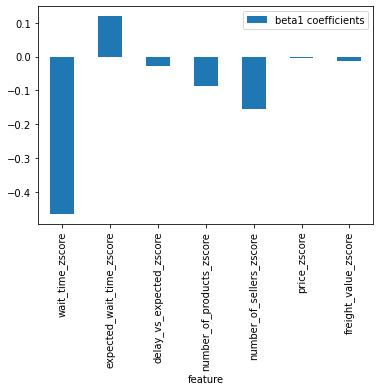

In [20]:
model4_df = pd.DataFrame(model4.params)
model4_df.reset_index(inplace=True)
model4_df
#model4_df.set_index('index', inplace=True)
model4_df = model4_df.rename(columns={'index':'feature',0:'beta1 coefficients'})
model4_df = model4_df.loc[1:]
model4_df.set_index('feature', inplace=True)
model4_df.plot(kind='bar')

<details>
    <summary>💡Explanations</summary>
    

- `wait_time` is the biggest explanatory variable
- The more `products` and `sellers` there are for a single order, the lower the `review_score`. 
- Distance also plays a role.
- Depending on your choice of feature, you may not be able to conclude anything about `price` and `freight_value` if their p-values are too high
    
- Overall, this multivariate regression remains statistically significant, because its F-statistics are much greater than 1 (at least one feature has a very low p-value)

- R-squared hasn't increased by much. Most of the explanability of review_score lies outside of the orders dataset.

Low R-squared is common when the number of observations (n) is much higher than the number of features (p). Relevant insights can still be derived from such regressions, provided they are statistically significant
</details>



## 3 - Check model performance

Regression performance should not be measured only by it's R-squared!  
Always visualize the distribution of the predictions, and especially the residuals.

❓ Compute the residuals, notice how their mean is equal to 0 (always the case in linear regression), and compute the associated RMSE.   
Plot the `residuals` in a histogram.

In [21]:
df_zscore[All_z_score]

,wait_time_zscore,expected_wait_time_zscore,delay_vs_expected_zscore,number_of_products_zscore,number_of_sellers_zscore,price_zscore,freight_value_zscore
0,-0.432597,-0.936198,-0.16311,-0.161452,-0.112854,-0.512242,-0.652992
1,0.127585,-0.526056,-0.16311,-0.161452,-0.112854,-0.087186,-0.000959
2,-0.332241,0.330125,-0.16311,-0.161452,-0.112854,0.110225,-0.165361
3,0.067507,0.278666,-0.16311,-0.161452,-0.112854,-0.440321,0.205239
4,-1.015545,-1.327886,-0.16311,-0.161452,-0.112854,-0.560588,-0.652992
...,...,...,...,...,...,...,...
97010,-0.455502,-0.588863,-0.16311,-0.161452,-0.112854,-0.310950,-0.450509
97011,1.009096,-0.032877,-0.16311,-0.161452,-0.112854,0.182098,-0.124493
97012,1.288449,0.757478,-0.16311,-0.161452,-0.112854,0.331067,1.961642
97013,0.473871,1.524534,-0.16311,0.711569,-0.112854,1.068914,2.712130


In [22]:
y_predicted = model4.predict(df_zscore[All_z_score])
y_predicted

0        4.279194
1        4.056356
2        4.373854
3        4.179393
4        4.504155
           ...   
97010    4.327563
97011    3.705011
97012    3.640457
97013    4.022308
97014    4.439948
Length: 97007, dtype: float64

In [23]:
y = df_zscore['review_score']
residuals = y - y_predicted
residuals

0       -0.279194
1       -0.056356
2        0.626146
3        0.820607
4        0.495845
           ...   
97010    0.672437
97011    0.294989
97012    1.359543
97013   -2.022308
97014    0.560052
Length: 97007, dtype: float64

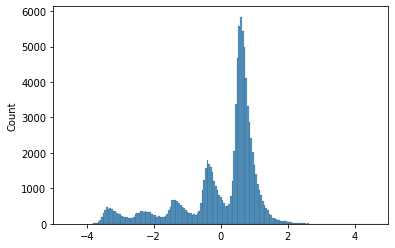

In [24]:
sns.histplot(residuals)
plt.xlim(-5,5);

In [25]:
residuals.mean()

1.6755146618813377e-16

In [26]:
rmse = np.sqrt(sum((y_predicted-y)**2/df_zscore.shape[0]))
rmse

1.201029902273158

❓ Can you guess why the residual distplot is such a strange shape? To understand, plot on the same axis the histogram of `review_score` as well as that of the `predicted_review_score` for each row of the dataset

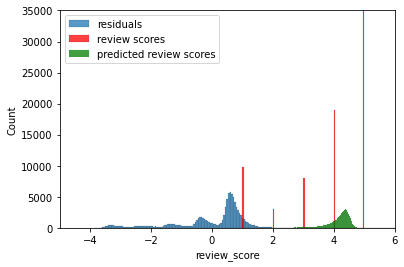

In [27]:
# Your code
sns.histplot(residuals, label='residuals')
sns.histplot(df_zscore['review_score'], label='review scores', color='red')
sns.histplot(y_predicted, label='predicted review scores', color='green')
plt.xlim(-5,6)
plt.ylim(0,35_000)
plt.legend()

<details>
    <summary>💡Explanations</summary>

☝️ Our model is not so great, for two reasons
- First, because we don't have enough features to explain a significant proportion of the review_scores (low R-squared)
- Secondly, because we are trying to fit a "linear regression" function to a discreet classification problem

Tomorrow, you will discover a new model: the logistic regression classifier
    
</details>

🏁 Great job! Don't forget to *save*, *commit* and *push* this notebook when you are done